# LbCpf1 dataset

In [1]:
import pandas as pd
OT_data=pd.read_csv("D://PhD_related/Dataset/LbCpf1_dataset_features_clean1.csv", index_col=[0], encoding="cp1252")
OT_data.head()

Ã¯Â»Â¿C_OTSeqPosition1    tm_seed  tm_non-seed    tm_gRNA  no_mismatches  \
0                       0 -12.756229    28.530928  54.263003              0   
1                       0 -34.785547    15.317857  41.064040              3   
2                       0 -12.756229    30.629915  57.330345              3   
3                       0  -1.144873    13.296060  48.576758              4   
4                       0 -43.081487    15.317857  41.652501              4   

   no_bulges  mismatch_POS9  mismatch_POS8  mismatch_POS7  mismatch_POS6  ...  \
0          0              0              0              0              0  ...   
1          0              1              0              0              1  ...   
2          0              0              0              0              0  ...   
3          0              1              0              0              1  ...   
4          1              0              0              1              0  ...   

   A_OTSeqPosition13  A_OTSeqPosition12  A_OTSeqPosition11  A_OTSeqPosition10  \
0                  0                  0                  1                  0   
1                  0                  1                  0                  0   
2                  0                  0                  1                  0   
3                  0                  0                  1                  0   
4                  0                  1                  0                  0   

   A_OTSeqPosition1   AT_freq   AG_freq    AC_freq    AA_freq  AAAA_OT  
0                 0  7.407407  7.407407   0.000000   7.407407        0  
1                 0  7.407407  7.407407  14.814815  22.222222        1  
2                 0  7.407407  0.000000   7.407407   7.407407        0  
3                 0  7.407407  7.407407   7.407407  22.222222        1  
4                 0  7.407407  7.407407   7.407407  22.222222        1  

[5 rows x 653 columns]

# Distribution of nucleotides in positive off-targets

In [2]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
OT_data=pd.read_csv("D://PhD_related/manuscript_obj1/seq_encoding_map/LbCpf1/LbCpf1-POT_HM-df1.csv", index_col=[0], encoding="cp1252")
index = ['A', 'T', 'G', 'C']
columns = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13", "14", "15", "16", "17", "18", "19", "20", "21", "22", "23", "24", "25", "26", "27"]
df = DataFrame(OT_data, index=index, columns=columns)
from matplotlib.pyplot import figure
#sns.color_palette("crest", as_cmap=True)
figure(figsize=(30, 5), dpi=1600)
ax = sns.heatmap( df , linewidth = 0.75, cmap="Blues")
#ax.title.set_text('Spearman Correlation')
plt.xticks(font="Arial Rounded MT Bold", fontsize=25)
#plt.xlabel('Prediction models', font="Arial Rounded MT Bold", fontsize=28)
#plt.ylabel('Datasets', font="Arial Rounded MT Bold", fontsize=28)
plt.yticks(font="Arial Rounded MT Bold", fontsize=25)
#plt.title('Spearman correlation', font="Arial Rounded MT Bold", fontsize=18) 
ax.set_aspect('equal', adjustable="box")
#plt.savefig('D://PhD_related/manuscript_obj1/graphs/heatmap_independent1.png', dpi=5000, bbox_inches = 'tight')
plt.show()


# Distribution of nucleotides in negative off-targets

In [3]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
OT_data=pd.read_csv("D://PhD_related/manuscript_obj1/seq_encoding_map/LbCpf1/LbCpf1-NOT_HM-df1.csv", index_col=[0], encoding="cp1252")
index = ['A', 'T', 'G', 'C']
columns = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13", "14", "15", "16", "17", "18", "19", "20", "21", "22", "23", "24", "25", "26", "27"]
df = DataFrame(OT_data, index=index, columns=columns)
from matplotlib.pyplot import figure
#sns.color_palette("crest", as_cmap=True)
figure(figsize=(30, 5), dpi=1600)
ax = sns.heatmap( df , linewidth = 0.75, cmap="Blues")
#ax.title.set_text('Spearman Correlation')
plt.xticks(font="Arial Rounded MT Bold", fontsize=25)
#plt.xlabel('Prediction models', font="Arial Rounded MT Bold", fontsize=28)
#plt.ylabel('Datasets', font="Arial Rounded MT Bold", fontsize=28)
plt.yticks(font="Arial Rounded MT Bold", fontsize=25)
#plt.title('Spearman correlation', font="Arial Rounded MT Bold", fontsize=18) 
ax.set_aspect('equal', adjustable="box")
#plt.savefig('D://PhD_related/manuscript_obj1/graphs/heatmap_independent1.png', dpi=5000, bbox_inches = 'tight')
plt.show()


# MLPClassifier

MLPClassifier is the best performing classifier on LbCpf1 dataset with high precision and recall for positive off-targets compared to other classifiers

In [7]:
import warnings  
import pandas as pd
import numpy as np
np.random.seed(198)
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sys import *
OT_data=pd.read_csv("D://PhD_related/Dataset/LbCpf1_dataset_features_clean1.csv", index_col=[0], encoding="cp1252")
#df = pd.DataFrame(OT_data)
le = preprocessing.LabelEncoder()
print("off-target' : ",OT_data['Y'].unique())
OT_data['Y'] = le.fit_transform(OT_data['Y'])
features = [col for col in OT_data.columns if col not in ['Y']]
data = OT_data[features]
target = OT_data['Y']
data_train, data_test, target_train, target_test = train_test_split(data,target, test_size = 0.25, shuffle=True)

mlp= MLPClassifier(solver='adam', alpha=0.0002, activation= 'relu', hidden_layer_sizes=[20,28,12,10,14,5], learning_rate_init=0.001, random_state=6, tol=0.00002, learning_rate='adaptive', beta_1=0.9, beta_2=0.71, epsilon=1e-24, n_iter_no_change=20, validation_fraction=0.25, verbose=True)
mlp.fit(data_train, target_train)

Pred_labels = mlp.predict(data_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(target_test,Pred_labels.round()))
print(classification_report(target_test,Pred_labels.round()))
from sklearn.metrics import cohen_kappa_score
print(cohen_kappa_score(target_test,Pred_labels.round()))
precision, recall, _ = precision_recall_curve(target_test,Pred_labels.round())
auc_score = auc(recall, precision)
print('No Skill PR AUC: %.3f' % auc_score)
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(target_test,Pred_labels.round())
print('Logistic ROC AUC %.3f' % roc_auc)
from scipy.stats import spearmanr
print(spearmanr(target_test,Pred_labels.round()))

off-target' :  [0 1]
Iteration 1, loss = 0.29773447
Iteration 2, loss = 0.02324010
Iteration 3, loss = 0.01813579
Iteration 4, loss = 0.01412279
Iteration 5, loss = 0.01178855
Iteration 6, loss = 0.01121262
Iteration 7, loss = 0.01040835
Iteration 8, loss = 0.01047980
Iteration 9, loss = 0.00970622
Iteration 10, loss = 0.00974306
Iteration 11, loss = 0.00961077
Iteration 12, loss = 0.00956997
Iteration 13, loss = 0.00983505
Iteration 14, loss = 0.00921750
Iteration 15, loss = 0.00945404
Iteration 16, loss = 0.01045548
Iteration 17, loss = 0.00967594
Iteration 18, loss = 0.00947036
Iteration 19, loss = 0.00911089
Iteration 20, loss = 0.00932054
Iteration 21, loss = 0.00950500
Iteration 22, loss = 0.00933700
Iteration 23, loss = 0.00929816
Iteration 24, loss = 0.00954958
Iteration 25, loss = 0.00905613
Iteration 26, loss = 0.00941422
Iteration 27, loss = 0.00946568
Iteration 28, loss = 0.00946611
Iteration 29, loss = 0.00927137
Iteration 30, loss = 0.00916649
Iteration 31, loss = 0.00907

# Confusion matrix

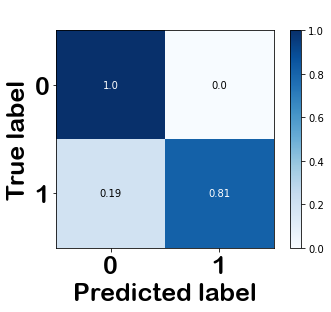

In [6]:
import itertools
import matplotlib.pyplot as plt
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(target_test,Pred_labels, normalize=True)
plt.title(" ", font="Arial Rounded MT Bold", fontsize=25)
plt.xticks(font="Arial Rounded MT Bold", fontsize=25)
plt.xlabel('Predicted label', font="Arial Rounded MT Bold", fontsize=25)
plt.ylabel('True label', font="Arial Rounded MT Bold", fontsize=25)
plt.yticks(font="Arial Rounded MT Bold", fontsize=25)
ax.set_aspect('equal', adjustable="box")
#plt.savefig('D://PhD_related/manuscript_obj1/graphs/CM_LbCpf1.png', dpi=1500, aspect=1, fontname="Arial Rounded MT Bold", bbox_inches = 'tight')
plt.show()

# 10-fold cross-validation of MLPClassifier

Iteration 1, loss = 0.22056752
Iteration 2, loss = 0.01911729
Iteration 3, loss = 0.01445268
Iteration 4, loss = 0.01088056
Iteration 5, loss = 0.00959453
Iteration 6, loss = 0.00958588
Iteration 7, loss = 0.00857987
Iteration 8, loss = 0.00888084
Iteration 9, loss = 0.00919877
Iteration 10, loss = 0.00814374
Iteration 11, loss = 0.00816665
Iteration 12, loss = 0.00804670
Iteration 13, loss = 0.00820222
Iteration 14, loss = 0.00784078
Iteration 15, loss = 0.00786490
Iteration 16, loss = 0.00796837
Iteration 17, loss = 0.00756478
Iteration 18, loss = 0.00762681
Iteration 19, loss = 0.00755790
Iteration 20, loss = 0.00776924
Iteration 21, loss = 0.00767981
Iteration 22, loss = 0.00740320
Iteration 23, loss = 0.00745520
Iteration 24, loss = 0.00743314
Iteration 25, loss = 0.00732026
Iteration 26, loss = 0.00756566
Iteration 27, loss = 0.00752080
Iteration 28, loss = 0.00744902
Iteration 29, loss = 0.00778487
Iteration 30, loss = 0.00766379
Iteration 31, loss = 0.00766827
Iteration 32, los

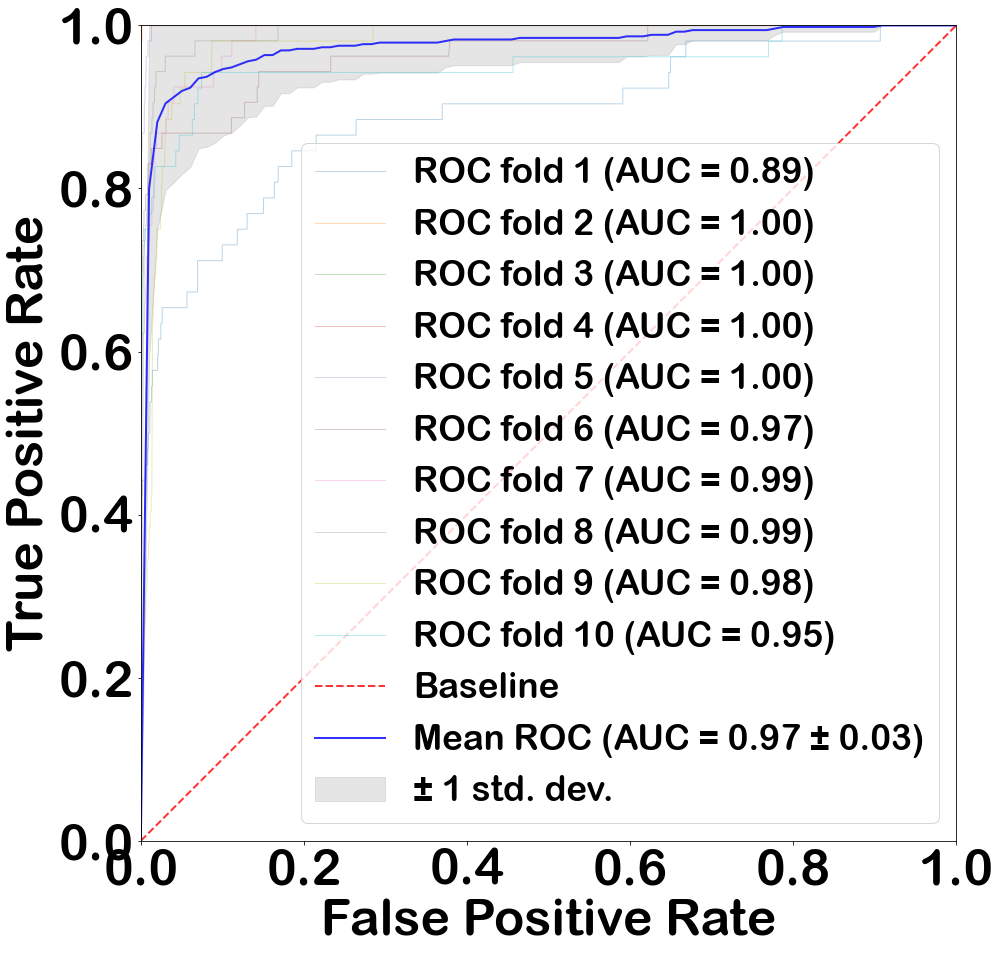

In [2]:
import warnings  
import pandas as pd
import numpy as np
np.random.seed(198)
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn import svm, metrics, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import AdaBoostClassifier

OT_data=pd.read_csv("D://PhD_related/Dataset/LbCpf1_dataset_features_clean1.csv", index_col=[0], encoding="cp1252")
df = pd.DataFrame(OT_data)
Data = df[0:80845] 
Data1 = Data.drop(['Y'],axis=1)
Target = Data['Y']
Data1 = np.asarray(Data1)
Target = np.asarray(Target)

#10-stratified K-fold cross validation
TruePositives = []
AUCs = []
FalsePositives = np.linspace(0, 1, 100)
splits = StratifiedKFold(n_splits=10, random_state=None)
fig, ax = plt.subplots(figsize=(15,15))
iter=0
for training, validation in splits.split(Data1, Target): 
    iter=iter+1 
    Data_train, Data_test = Data1[training], Data1[validation] 
    Target_train, Target_test = Target[training], Target[validation]
    mlp=MLPClassifier(solver='adam', alpha=0.0002, activation= 'relu', hidden_layer_sizes=[20,28,12,10,14,5], learning_rate_init=0.001, random_state=6, tol=0.00002, learning_rate='adaptive', beta_1=0.9, beta_2=0.71, epsilon=1e-24, n_iter_no_change=20, validation_fraction=0.25, verbose=True)
    mlp.fit(Data_train, Target_train)
    ROC_plt = plot_roc_curve(mlp, Data_test, Target_test, name='ROC fold {}'.format(iter), alpha=0.3, lw=1, ax=ax)
    TruePosR = np.interp(FalsePositives, ROC_plt.fpr, ROC_plt.tpr)
    TruePosR[0] = 0.0
    TruePositives.append(TruePosR)
    AUCs.append(ROC_plt.roc_auc)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)

TruePositivesM = np.mean(TruePositives, axis=0)
TruePositivesM[-1] = 1.0
AUCm = auc(FalsePositives, TruePositivesM)
AUCstd = np.std(AUCs)
ax.plot(FalsePositives, TruePositivesM, color='b', label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (AUCm, AUCstd), lw=2, alpha=.8)

TruePositivesSTD = np.std(TruePositives, axis=0)
TruePosMax = np.minimum(TruePositivesM + TruePositivesSTD, 1)
TruePosMin = np.maximum(TruePositivesM - TruePositivesSTD, 0)
ax.fill_between(FalsePositives, TruePosMin, TruePosMax, color='grey', alpha=.2, label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[0, 1], ylim=[0, 1])
ax.set_aspect('equal', adjustable="box")
#ax.legend(loc="lower right")
plt.xticks(font="Arial Rounded MT Bold", fontsize=50)
plt.xlabel('False Positive Rate', font="Arial Rounded MT Bold", fontsize=50)
plt.ylabel('True Positive Rate', font="Arial Rounded MT Bold", fontsize=50)
plt.yticks(font="Arial Rounded MT Bold", fontsize=50)
plt.legend(["ROC fold 1 (AUC = 0.89)", "ROC fold 2 (AUC = 1.00)", "ROC fold 3 (AUC = 1.00)", "ROC fold 4 (AUC = 1.00)", "ROC fold 5 (AUC = 1.00)", "ROC fold 6 (AUC = 0.97)", "ROC fold 7 (AUC = 0.99)", "ROC fold 8 (AUC = 0.99)", "ROC fold 9 (AUC = 0.98)", "ROC fold 10 (AUC = 0.95)", "Baseline", "Mean ROC (AUC = 0.97 ± 0.03)", "± 1 std. dev."], prop={"size":35, "family":'Arial Rounded MT Bold'}, loc="lower right")
#plt.savefig('D://PhD_related/manuscript_obj1/graphs/CV-ROC_LbCpf1-1.png', dpi=3000, bbox_inches = 'tight')
plt.show()

# SHAP analysis

In [ ]:
import shap
data_for_prediction = shap.sample(data_test, 100)
n1=mlp.predict_proba(data_for_prediction)
data_for_prediction1 = shap.sample(data_train, 100)
k_explainer = shap.KernelExplainer(mlp.predict, data_for_prediction)
k_shap_values = k_explainer.shap_values(data_for_prediction1)
shap.initjs()
shap.force_plot(k_explainer.expected_value, k_shap_values[1], data_for_prediction)


In [ ]:
shap.summary_plot(k_shap_values, features=data_for_prediction, feature_names=data_for_prediction.columns)

# Other models optimized on LbCpf1 dataset

# RandomForestClassifier

Second best performing model on LbCpf1 dataset

In [2]:
import warnings  
import pandas as pd
import numpy as np
np.random.seed(198)
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sys import *
OT_data=pd.read_csv("D://PhD_related/Dataset/LbCpf1_dataset_features_clean1.csv", index_col=[0], encoding="cp1252")
#df = pd.DataFrame(OT_data)
le = preprocessing.LabelEncoder()
print("off-target' : ",OT_data['Y'].unique())
OT_data['Y'] = le.fit_transform(OT_data['Y'])
features = [col for col in OT_data.columns if col not in ['Y']]
data = OT_data[features]
target = OT_data['Y']
data_train, data_test, target_train, target_test = train_test_split(data,target, test_size = 0.25, shuffle=True)

rf=RandomForestClassifier(n_estimators=380, max_depth=239, class_weight={0:0.1,1:0.2}, min_samples_leaf=10, max_features=239, random_state=0, n_jobs=2, verbose=True)
rf.fit(data_train, target_train)

Pred_labels = rf.predict(data_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(target_test,Pred_labels.round()))
print(classification_report(target_test,Pred_labels.round()))
from sklearn.metrics import cohen_kappa_score
print(cohen_kappa_score(target_test,Pred_labels.round()))
precision, recall, _ = precision_recall_curve(target_test,Pred_labels.round())
auc_score = auc(recall, precision)
print('No Skill PR AUC: %.3f' % auc_score)
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(target_test,Pred_labels.round())
print('Logistic ROC AUC %.3f' % roc_auc)
from scipy.stats import spearmanr
print(spearmanr(target_test,Pred_labels.round()))

off-target' :  [0 1]


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   23.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:  1.7min
[Parallel(n_jobs=2)]: Done 380 out of 380 | elapsed:  3.2min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 380 out of 380 | elapsed:    0.2s finished


[[20060    18]
 [   30    99]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20078
           1       0.85      0.77      0.80       129

    accuracy                           1.00     20207
   macro avg       0.92      0.88      0.90     20207
weighted avg       1.00      1.00      1.00     20207

0.8036859285742044
No Skill PR AUC: 0.808
Logistic ROC AUC 0.883
SpearmanrResult(correlation=0.8046556001786654, pvalue=0.0)


Mean shap values calculated from RandomForestClassifier (second best performing model)

In [ ]:
import shap
data_for_prediction = shap.sample(data_test, 50)
n1=ada.predict_proba(data_for_prediction)
data_for_prediction1 = shap.sample(data_train, 50)
k_explainer = shap.KernelExplainer(ada.predict, data_for_prediction1)
k_shap_values = k_explainer.shap_values(data_for_prediction)
shap.initjs()
#shap.force_plot(k_explainer.expected_value, k_shap_values[1], data_for_prediction)


In [ ]:
shap.summary_plot(k_shap_values, features=data_for_prediction, feature_names=data_for_prediction.columns)

# LinearSVC

In [3]:
import warnings  
import pandas as pd
import numpy as np
np.random.seed(198)
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
import seaborn as sns
from sklearn.svm import LinearSVC
from sys import *
OT_data=pd.read_csv("D://PhD_related/Dataset/LbCpf1_dataset_features_clean1.csv", index_col=[0], encoding="cp1252")
#df = pd.DataFrame(OT_data)
le = preprocessing.LabelEncoder()
print("off-target' : ",OT_data['Y'].unique())
OT_data['Y'] = le.fit_transform(OT_data['Y'])
features = [col for col in OT_data.columns if col not in ['Y']]
data = OT_data[features]
target = OT_data['Y']
data_train, data_test, target_train, target_test = train_test_split(data,target, test_size = 0.25, shuffle=True)

svc=LinearSVC(C=2, loss='squared_hinge', penalty='l2', dual=False, tol=0.0002, class_weight={0:0.122, 1:0.50})
svc.fit(data_train, target_train)

Pred_labels = svc.predict(data_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(target_test,Pred_labels.round()))
print(classification_report(target_test,Pred_labels.round()))
from sklearn.metrics import cohen_kappa_score
print(cohen_kappa_score(target_test,Pred_labels.round()))
precision, recall, _ = precision_recall_curve(target_test,Pred_labels.round())
auc_score = auc(recall, precision)
print('No Skill PR AUC: %.3f' % auc_score)
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(target_test,Pred_labels.round())
print('Logistic ROC AUC %.3f' % roc_auc)
from scipy.stats import spearmanr
print(spearmanr(target_test,Pred_labels.round()))

off-target' :  [0 1]
[[20038    40]
 [   19   110]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20078
           1       0.73      0.85      0.79       129

    accuracy                           1.00     20207
   macro avg       0.87      0.93      0.89     20207
weighted avg       1.00      1.00      1.00     20207

0.787068813243954
No Skill PR AUC: 0.793
Logistic ROC AUC 0.925
SpearmanrResult(correlation=0.7893390528844778, pvalue=0.0)


# logisticRegression

In [4]:
import warnings  
import pandas as pd
import numpy as np
np.random.seed(198)
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sys import *
OT_data=pd.read_csv("D://PhD_related/Dataset/LbCpf1_dataset_features_clean1.csv", index_col=[0], encoding="cp1252")
#df = pd.DataFrame(OT_data)
le = preprocessing.LabelEncoder()
print("off-target' : ",OT_data['Y'].unique())
OT_data['Y'] = le.fit_transform(OT_data['Y'])
features = [col for col in OT_data.columns if col not in ['Y']]
data = OT_data[features]
target = OT_data['Y']
data_train, data_test, target_train, target_test = train_test_split(data,target, test_size = 0.25, shuffle=True)

lg1=LogisticRegression(class_weight={0:0.5, 1:2}, C=1, max_iter=300, solver='newton-cg')
lg1.fit(data_train, target_train)

Pred_labels = lg1.predict(data_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(target_test,Pred_labels.round()))
print(classification_report(target_test,Pred_labels.round()))
from sklearn.metrics import cohen_kappa_score
print(cohen_kappa_score(target_test,Pred_labels.round()))
precision, recall, _ = precision_recall_curve(target_test,Pred_labels.round())
auc_score = auc(recall, precision)
print('No Skill PR AUC: %.3f' % auc_score)
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(target_test,Pred_labels.round())
print('Logistic ROC AUC %.3f' % roc_auc)
from scipy.stats import spearmanr
print(spearmanr(target_test,Pred_labels.round()))

off-target' :  [0 1]
[[20042    36]
 [   19   110]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20078
           1       0.75      0.85      0.80       129

    accuracy                           1.00     20207
   macro avg       0.88      0.93      0.90     20207
weighted avg       1.00      1.00      1.00     20207

0.7986350336648574
No Skill PR AUC: 0.804
Logistic ROC AUC 0.925
SpearmanrResult(correlation=0.8001864297297379, pvalue=0.0)


# DecisionTreeClassifier

In [5]:
import warnings  
import pandas as pd
import numpy as np
np.random.seed(198)
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from matplotlib.axes import Axes
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sys import *
OT_data=pd.read_csv("D://PhD_related/Dataset/LbCpf1_dataset_features_clean1.csv", index_col=[0], encoding="cp1252")
#df = pd.DataFrame(OT_data)
le = preprocessing.LabelEncoder()
print("off-target' : ",OT_data['Y'].unique())
OT_data['Y'] = le.fit_transform(OT_data['Y'])
features = [col for col in OT_data.columns if col not in ['Y']]
data = OT_data[features]
target = OT_data['Y']
data_train, data_test, target_train, target_test = train_test_split(data,target, test_size = 0.25, shuffle=True)

dtc= DecisionTreeClassifier(class_weight={0:0.25, 1:1},max_features=239, max_depth=1000, ccp_alpha=1e-10, random_state=0)
dtc.fit(data_train, target_train)

Pred_labels = dtc.predict(data_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(target_test,Pred_labels.round()))
print(classification_report(target_test,Pred_labels.round()))
from sklearn.metrics import cohen_kappa_score
print(cohen_kappa_score(target_test,Pred_labels.round()))
precision, recall, _ = precision_recall_curve(target_test,Pred_labels.round())
auc_score = auc(recall, precision)
print('No Skill PR AUC: %.3f' % auc_score)
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(target_test,Pred_labels.round())
print('Logistic ROC AUC %.3f' % roc_auc)
from scipy.stats import spearmanr
print(spearmanr(target_test,Pred_labels.round()))

off-target' :  [0 1]
[[20038    40]
 [   26   103]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20078
           1       0.72      0.80      0.76       129

    accuracy                           1.00     20207
   macro avg       0.86      0.90      0.88     20207
weighted avg       1.00      1.00      1.00     20207

0.7557131631440027
No Skill PR AUC: 0.760
Logistic ROC AUC 0.898
SpearmanrResult(correlation=0.756729812080893, pvalue=0.0)


# Adaboost Classifier

In [9]:
import warnings  
import pandas as pd
import numpy as np
np.random.seed(198)
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from matplotlib.axes import Axes
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sys import *
OT_data=pd.read_csv("D://PhD_related/Dataset/LbCpf1_dataset_features_clean1.csv", index_col=[0], encoding="cp1252")
#df = pd.DataFrame(OT_data)
le = preprocessing.LabelEncoder()
print("off-target' : ",OT_data['Y'].unique())
OT_data['Y'] = le.fit_transform(OT_data['Y'])
features = [col for col in OT_data.columns if col not in ['Y']]
data = OT_data[features]
target = OT_data['Y']
data_train, data_test, target_train, target_test = train_test_split(data,target, test_size = 0.25, shuffle=True)

ada= AdaBoostClassifier(n_estimators=118, learning_rate=0.641, random_state=0)
ada.fit(data_train, target_train)

Pred_labels = dtc.predict(data_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(target_test,Pred_labels.round()))
print(classification_report(target_test,Pred_labels.round()))
from sklearn.metrics import cohen_kappa_score
print(cohen_kappa_score(target_test,Pred_labels.round()))
precision, recall, _ = precision_recall_curve(target_test,Pred_labels.round())
auc_score = auc(recall, precision)
print('No Skill PR AUC: %.3f' % auc_score)
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(target_test,Pred_labels.round())
print('Logistic ROC AUC %.3f' % roc_auc)
from scipy.stats import spearmanr
print(spearmanr(target_test,Pred_labels.round()))


off-target' :  [0 1]
[[20038    40]
 [   26   103]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20078
           1       0.72      0.80      0.76       129

    accuracy                           1.00     20207
   macro avg       0.86      0.90      0.88     20207
weighted avg       1.00      1.00      1.00     20207

0.7557131631440027
No Skill PR AUC: 0.760
Logistic ROC AUC 0.898
SpearmanrResult(correlation=0.756729812080893, pvalue=0.0)


# Precision-Recall curve of all the models

In [11]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve

#ax = plt.gca()
fig, ax = plt.subplots(figsize=(20, 20), dpi=1000)

plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xticks(font="Arial Rounded MT Bold", fontsize=50)
plt.xlabel('Recall (Predicted label:1)', font="Arial Rounded MT Bold", fontsize=70)
plt.ylabel('Precision (Predicted label:1)', font="Arial Rounded MT Bold", fontsize=70)
plt.yticks(font="Arial Rounded MT Bold", fontsize=50)
scv1=plot_precision_recall_curve(mlp, data_test, target_test, linewidth = 6, ax=ax) 
scv2=plot_precision_recall_curve(rf, data_test, target_test, linewidth = 6, ax=ax)
scv3=plot_precision_recall_curve(svc, data_test, target_test, linewidth = 6, ax=ax)
scv3=plot_precision_recall_curve(lg1, data_test, target_test, linewidth = 6, ax=ax)
scv3=plot_precision_recall_curve(dtc, data_test, target_test, linewidth = 6, ax=ax)
scv3=plot_precision_recall_curve(ada, data_test, target_test, linewidth = 6, ax=ax)
scv1.plot(ax=ax)
ax.legend(["MLPClassifer (Ap=0.87)", "RandomForestClassifier(AP = 0.89)", "LinearSVC (AP = 0.89)", "LogisticRegrgession (AP = 0.89)", "DecisionTreeClassifier (AP = 0.69)", "AdaboostClassifier (AP = 0.87)"], prop={"size":50, "family":'Arial Rounded MT Bold'}, loc="lower left")
plt.show()

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 380 out of 380 | elapsed:    0.3s finished
